# Analyzing Pond CO2 Emissions

In [1]:
#!pip install pandas --user

## Importing Packages

In [2]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error 
from sklearn import preprocessing 
from statsmodels.stats.anova import anova_lm

## Reading Data

In [3]:
# imported data
# df = pd.read_csv('TotalData.csv') 
# df = pd.read_csv('Pond1Data.csv') 
df = pd.read_csv('Pond2Data.csv') 
# df = pd.read_csv('Pond3Data.csv') 
# df = pd.read_csv('Pond4Data.csv') 
df.rename(columns={'CO2(ppm)': 'CO2_ppm'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

In [4]:
# check first 5 rows of data
df.head()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY,TEMPUNIT,SENSOR,Unnamed: 9
0,2025-04-04 19:53:00,14.9,24.9,2294,408,24.5,99.9,C,YELLOW,POND 2
1,2025-04-04 20:03:00,13.8,24.2,2103,408,24.7,99.9,C,YELLOW,NaN
2,2025-04-04 20:13:00,13.7,23.4,2159,409,24.9,99.9,C,YELLOW,NaN
3,2025-04-04 20:23:00,12.1,21.1,1848,408,25.0,99.9,C,YELLOW,NaN
4,2025-04-04 20:33:00,12.2,21.0,1865,408,25.1,99.9,C,YELLOW,NaN


In [5]:
# check shape of data
df.shape

(339, 10)

In [6]:
# check for nulls
df.isnull().sum()

DATE                  0
PM2.5(ug/m3)          0
PM10(ug/m3)           0
PARTICLES(per/L)      0
CO2_ppm               0
TEMPERATURE           0
HUMIDITY              0
TEMPUNIT              0
SENSOR                0
Unnamed: 9          335
dtype: int64

In [7]:
# check data types
df.dtypes

DATE                datetime64[ns]
PM2.5(ug/m3)               float64
PM10(ug/m3)                float64
PARTICLES(per/L)             int64
CO2_ppm                      int64
TEMPERATURE                float64
HUMIDITY                   float64
TEMPUNIT                    object
SENSOR                      object
Unnamed: 9                  object
dtype: object

In [8]:
# get column names
df.columns

Index(['DATE', 'PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'CO2_ppm',
       'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'],
      dtype='object')

In [9]:
# get basic stats
df.describe()

,DATE,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
count,339,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2025-04-06 10:51:07.079645952,5.711799,9.250147,910.421829,416.973451,21.307080,86.885841
min,2025-04-04 19:53:00,1.100000,1.600000,190.000000,400.000000,11.300000,23.400000
25%,2025-04-05 21:07:00,2.100000,3.400000,382.000000,402.000000,14.700000,70.150000
50%,2025-04-06 14:05:00,4.300000,7.000000,695.000000,406.000000,18.400000,99.900000
75%,2025-04-07 04:14:00,8.550000,13.650000,1350.500000,429.000000,25.050000,99.900000
max,2025-04-07 19:57:00,69.800000,76.000000,10572.000000,480.000000,39.400000,99.900000
std,NaN,5.133102,7.401780,772.464332,21.637052,7.848499,20.034611


## Linear Regression

In [10]:
# create new data frame for analysis
dfA = df.drop(columns=['DATE', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'])

In [11]:
# check first 5 rows
dfA.head()

,PM2.5(ug/m3),PM10(ug/m3),PARTICLES(per/L),CO2_ppm,TEMPERATURE,HUMIDITY
0,14.9,24.9,2294,408,24.5,99.9
1,13.8,24.2,2103,408,24.7,99.9
2,13.7,23.4,2159,409,24.9,99.9
3,12.1,21.1,1848,408,25.0,99.9
4,12.2,21.0,1865,408,25.1,99.9


In [12]:
# check new shape
dfA.shape

(339, 6)

In [13]:
# check for nulls
dfA.isnull().sum()

PM2.5(ug/m3)        0
PM10(ug/m3)         0
PARTICLES(per/L)    0
CO2_ppm             0
TEMPERATURE         0
HUMIDITY            0
dtype: int64

In [14]:
# select target value (y) and independent variables (x)
y = df['CO2_ppm']
x = df[['TEMPERATURE', 'HUMIDITY']]

In [15]:
# divide data for training/testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [16]:
# check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((271, 2), (68, 2), (271,), (68,))

In [17]:
# check selected 5 rows of IVs
x_train.head()

,TEMPERATURE,HUMIDITY
81,17.1,99.9
302,33.8,51.5
295,36.8,43.9
323,36.8,45.8
336,19.9,81.2


In [18]:
# check same selected rows of target
y_train.head()

81     411
302    402
295    402
323    401
336    402
Name: CO2_ppm, dtype: int64

In [19]:
# perform linear regression
model = LinearRegression()

In [20]:
# fit x and y values together
model.fit(x_train,y_train)

LinearRegression()

In [21]:
# y-intercept
model.intercept_

np.float64(356.8752947116887)

In [22]:
# model coefficients (aka beta values) - written as [temperature, humidity]
model.coef_

array([0.37076926, 0.60296873])

In [23]:
# model is used to predict y_test data
y_pred = model.predict(x_test)

In [24]:
# predictions are listed
y_pred

array([426.01033339, 421.59817924, 422.5621793 , 426.38110264,
       398.76213499, 422.97002549, 426.08448724, 407.05277033,
       396.92513988, 426.04741031, 426.19571801, 403.5461887 ,
       420.32145706, 421.89479464, 421.82064079, 426.19571801,
       398.77074805, 422.30264082, 421.89479464, 421.93187157,
       417.83093427, 421.56110231, 400.70137831, 426.04741031,
       426.01033339, 426.01033339, 426.12156416, 422.89587163,
       398.12096447, 426.23279494, 426.19571801, 423.48910244,
       421.67233309, 426.04741031, 426.38110264, 421.74648694,
       405.09406205, 419.24585127, 422.67341008, 423.45202552,
       421.33864076, 421.59817924, 426.04741031, 395.22259549,
       426.08448724, 420.97573465, 422.89587163, 398.74265914,
       405.72586416, 418.28035138, 422.37679468, 426.08448724,
       405.43374276, 415.73402572, 407.35013564, 409.27064757,
       397.66293429, 423.30371782, 422.4138716 , 426.19571801,
       422.59925623, 401.43542318, 422.89587163, 421.63

In [25]:
# variance between y_test and y_pred values are averaged
mean_absolute_error(y_test, y_pred)

14.033150686622735

In [26]:
# average percentage of variance from actual value. Meaning, (actual - predicted)/actual
mean_absolute_percentage_error(y_test, y_pred)

0.03281293409401681

In [27]:
# another error test, but all numbers are squared so larger variance has a more significant impact.
mean_squared_error(y_test, y_pred)

362.51885393677674

In [28]:
#R squared explains what percentage of the variance can be explained by the IVs. In this case, IVs only explain 19.69% of variance in data
model.score(x_test, y_test)

0.19686814000288633

In [29]:
# This cell determines which IV contributes more to accurate predictions. 2 Models are made using only one IV, and they are fitted to the actual values. Whichever model is more accurate is more 
# Model with Temperature only
X_temp = df[['TEMPERATURE']]
X_temp = sm.add_constant(X_temp)
model_temp = sm.OLS(y, X_temp).fit()

# Model with humidity only
X_hum = df[['HUMIDITY']]
X_hum = sm.add_constant(X_hum)
model_hum = sm.OLS(y, X_hum).fit()

# Full model with Temperature + Humidity
X_full = df[['TEMPERATURE', 'HUMIDITY']]
X_full = sm.add_constant(X_full)
model_full = sm.OLS(y, X_full).fit()

# Compare models using F-test
f_test = anova_lm(model_temp, model_hum, model_full)
print(f_test)

# output explanation:
# df_resid - degrees of freedom for residual, number of observations minus number of parameters.
# ssr - sum of squared residuals, measures total unexplained variability.
# df_diff - change in degrees of freedom, difference in df_resid between the two models.
# ss_diff - change in sum of squared residuals, difference in ssr between the two models.
# F - F-statistic, compares how much adding humidity improves the model.
# Pr(>F) - P-value for the F-test, determines probability that any improvements made by adding the second IV are due to chance. Here 0.79 indicates that there is no significant improvement.

   df_resid            ssr  df_diff       ss_diff         F    Pr(>F)
0     337.0  142572.111567      0.0           NaN       NaN       NaN
1     337.0  127183.804940     -0.0  15388.306627      -inf       NaN
2     336.0  125922.420937      1.0   1261.384003  3.365763  0.067449


In [30]:
# revise
results = smf.ols('CO2_ppm ~ TEMPERATURE + HUMIDITY', data=dfA).fit()
print(results.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     43.11
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           2.15e-17
Time:                        22:35:07   Log-Likelihood:                -1484.0
No. Observations:                 339   AIC:                             2974.
Df Residuals:                     336   BIC:                             2986.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     353.9389     12.604     28.082      

In [31]:
resultsH = smf.ols('CO2_ppm ~ HUMIDITY', data=dfA).fit()
print(resultsH.summary())
# Omnibus: evaluates whether residuals are normally distributed. If p-value is small, NOT normally distributed
# Jarque-Bera (JB): more specific than Omnibus, checks for asymmetry/skewness and tailedness/kurtosis. If p-value is small, NOT normal
# Durbin-Watson: checks for autocorreltation (correlation between residuals). 0-2 is positive autocorrelation, 2-4 is negative autocorrelation, 2 is no autocorrelation (ideal)
# Condition number: measures collinearity (correlation among predictors). Less than 30 is ideal.

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     82.29
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           9.97e-18
Time:                        22:35:07   Log-Likelihood:                -1485.7
No. Observations:                 339   AIC:                             2975.
Df Residuals:                     337   BIC:                             2983.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    375.4039      4.702     79.831      0.0

In [32]:
resultsT = smf.ols('CO2_ppm ~ TEMPERATURE', data=dfA).fit()
print(resultsT.summary())

                            OLS Regression Results                            
Dep. Variable:                CO2_ppm   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     37.03
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           3.16e-09
Time:                        22:35:07   Log-Likelihood:                -1505.1
No. Observations:                 339   AIC:                             3014.
Df Residuals:                     337   BIC:                             3022.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     435.4562      3.236    134.559      

## Graphing

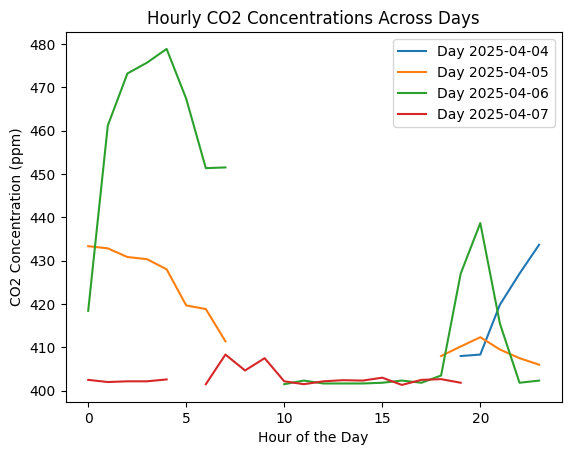

In [33]:
# create new data frame for graphing
dfG = df.drop(columns=['PM2.5(ug/m3)', 'PM10(ug/m3)', 'PARTICLES(per/L)', 'TEMPERATURE', 'HUMIDITY', 'TEMPUNIT', 'SENSOR', 'Unnamed: 9'])
# format DATE column
dfG['DATE'] = pd.to_datetime(dfG['DATE'])
# Extract the date (e.g., 01/01/2025)
df['DAY'] = df['DATE'].dt.date  
# Extract the hour (0, 1, ..., 23)
df['HOUR'] = df['DATE'].dt.hour  
# Create a pivot table where rows are days and columns are hours
co2_pivot = df.pivot_table(index='DAY', columns='HOUR', values='CO2_ppm', aggfunc='mean')

# Plot CO2 concentration for each day
for day, co2_values in co2_pivot.iterrows():
    co2_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Hourly CO2 Concentrations Across Days")
plt.legend(loc="best")
plt.show()

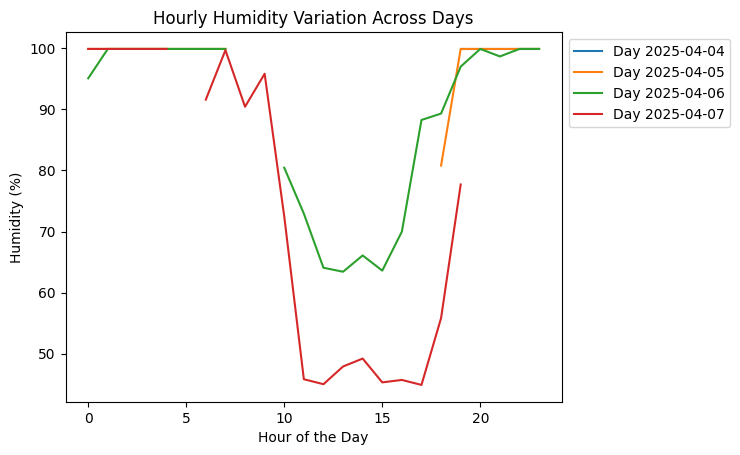

In [34]:
# Create a pivot table for Humidity
humidity_pivot = df.pivot_table(index='DAY', columns='HOUR', values='HUMIDITY', aggfunc='mean')

# Plot Humidity for each day
for day, humidity_values in humidity_pivot.iterrows():
    humidity_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Humidity (%)")
plt.title("Hourly Humidity Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

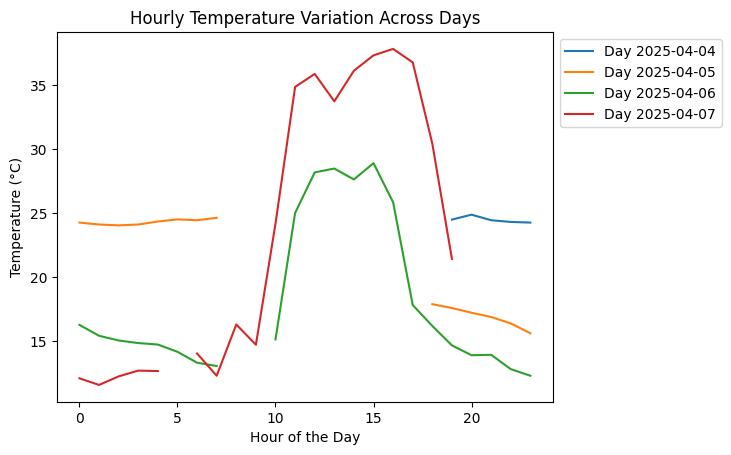

In [35]:
# Create a pivot table for Temperature
temperature_pivot = df.pivot_table(index='DAY', columns='HOUR', values='TEMPERATURE', aggfunc='mean')

# Plot Temperature for each day
for day, temperature_values in temperature_pivot.iterrows():
    temperature_values.plot(label=f"Day {day}")

# Add labels, title, and legend
plt.xlabel("Hour of the Day")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature Variation Across Days")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

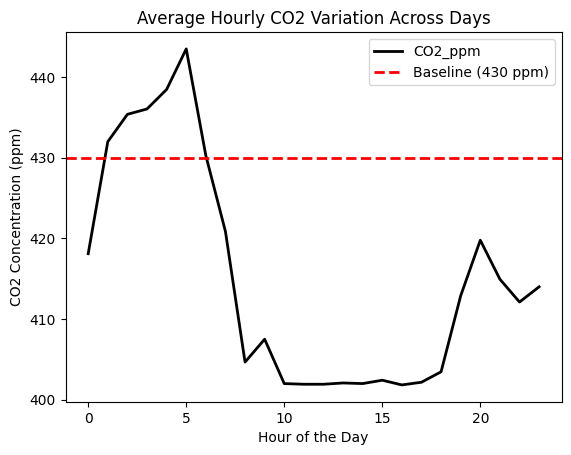

In [36]:
import matplotlib.pyplot as plt

# Compute the average CO2 concentration per hour
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')

# Plot the averaged CO2 data
avg_co2_per_hour.plot(label="Average CO2 Variation", color='black', linewidth=2)

# Add baseline at 430 ppm
plt.axhline(y=430, color='red', linestyle='dashed', linewidth=2, label="Baseline (430 ppm)")

# Add labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("CO2 Concentration (ppm)")
plt.title("Average Hourly CO2 Variation Across Days")
plt.legend(loc="best")

# Show the plot
plt.show()

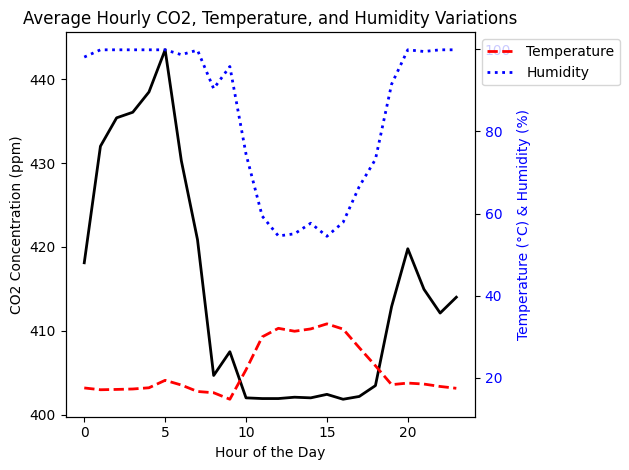

In [37]:
# Compute the average value per hour across all days for each variable
avg_co2_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='CO2_ppm', aggfunc='mean')
avg_temp_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='TEMPERATURE', aggfunc='mean')
avg_humidity_per_hour = df.pivot_table(index=df['DATE'].dt.hour, values='HUMIDITY', aggfunc='mean')

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot CO2 concentration
ax1.plot(avg_co2_per_hour, label="CO2 Concentration", color='black', linewidth=2)
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("CO2 Concentration (ppm)", color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create secondary y-axis for Temperature and Humidity
ax2 = ax1.twinx()
ax2.plot(avg_temp_per_hour, label="Temperature", color='red', linestyle="dashed", linewidth=2)
ax2.plot(avg_humidity_per_hour, label="Humidity", color='blue', linestyle="dotted", linewidth=2)
ax2.set_ylabel("Temperature (°C) & Humidity (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Combine legend entries from both axes
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add title and layout adjustments
plt.title("Average Hourly CO2, Temperature, and Humidity Variations")
plt.tight_layout()  # Adjusts layout to fit legend and labels properly

# Show the plot
plt.show()